# HW2- Steam Reviews


# Loading the Dataset

In [1]:
'''
from google.colab import drive
drive.mount('/content/drive/')
''';


 This is a dataset of around 21 million user reviews of around 300 different games on Steam: sto importando solo poche righe per lavorarci

In [2]:
def read_csv_with_time(path, time_fields, n_rows, usecols=None):
    '''
      This function reads a csv and returns a dataframe considering only the first n_rows rows
      and transforming the indicated time_fields from timestamp(seconds) in datetime objects

      Arguments
      _________
        path: str
          The path where the file is located
        time_fields: List[str]
          A list of the fields to be converted in datetime
        n_rows: int
          The number of rows to be considered
        usecols: List[str]
          The list of the columns to be loaded      
      Returns
      _______
        a pandas dataframe containing the processed file
    '''
    
    return pd.read_csv(path, header='infer', nrows=n_rows, 
        parse_dates= [tf for tf in time_fields], date_parser=lambda x: pd.to_datetime(x, unit='s'), usecols=usecols)

def hour_in_range(str_hour, range_hour):
    '''
      Given a string defining an hour and a range of hour as a tuple of that type of string,
      the function assert when the given hour is in the range

      Arguments
      _________
        str_hour: str
          in the format HH:MM:SS
        range_hour: Tuple(str)
          a tuple of string in the form (HH:MM:SS, HH:MM:SS) where the first hour is lower than the second
    '''
    
    min_hour, max_hour = range_hour
    assert (hour_comparator(min_hour, max_hour) == -1), "A range is valid only if the first element is lower than the second"
    return (hour_comparator(str_hour, min_hour) * hour_comparator(max_hour, str_hour)) >=0

def hour_comparator(str_h1, str_h2):
    '''
      Compares two string in the format HH:MM:SS and returns an integer value accordingly with their comparison
      
      Arguments
      __________
        str_h1: str
          in the format HH:MM:SS
        str_h2: str
          in the format HH:MM:SS
      
      Returns
      _______
        An integer representing the comparison between the given strings:
          -1  if the first is less then the second
           0  if the dates are the same
           1  if the first is greater than the second
    '''
    hh1, mm1, ss1 = map(int,str_h1.split(':'))
    hh2, mm2, ss2 = map(int, str_h2.split(':'))
    deltas = [hh1-hh2, mm1-mm2, ss1-ss2]
    for d in deltas:
        if d>0:
            return 1
        elif d < 0:
            return -1
    return 0

def get_range_index(str_hour, ranges):
    '''
      Given a string hour and a list of hour ranges, the function returns the index of the range
      to wich the string hour belongs

      Arguments
      _________
        str_hour: str
          in the format HH:MM:SS
        ranges: List[Tuple(str)]
          List containing hour ranges, so list o tuples of string in the form
          (HH:MM:SS, HH:MM:SS) where the first hour is lower than the second
      
      Return
      ______
        an integer indicating the index of the range where the hour is
    '''
    for i in range(len(ranges)):
        if hour_in_range(str_hour, ranges[i]):
            return i
    return -1

def transform_in_hour_ranges(df, column, ranges):
    '''
      Given a dataframe convert the given column of datetime to the index of the range in the given list
      where the value belongs

      Arguments
      _________
        df: pd.DataFrame
        column: str
          the name of a Datetime column of the df
        ranges: List[Tuple(str)]
          List containing hour ranges, so list o tuples of string in the form
          (HH:MM:SS, HH:MM:SS) where the first hour is lower than the second

      Return
      ______
        the df with the given column modified

    '''
    df[column]=df[column].apply(lambda x: get_range_index(x.strftime('%H:%M:%S'), ranges))
    return df


# REALLY USED:

#read_csv_with_time

def get_integer_ranges(ranges):
    return [(tuple(int(data) for data in x[0].split(':')), tuple(int(data) for data in x[1].split(':'))) for x in ranges]

def get_integer_range_index(tuple_hour, integer_ranges):
    
    for i in range(len(integer_ranges)):
        min_r, max_r = integer_ranges[i]
        if tuple_hour >= min_r and tuple_hour <= max_r:
            return i
    return -1

In [3]:
#fname = '/content/drive/MyDrive/HW2-ADM/steam_reviews.csv'
fname = '/content/drive/MyDrive/HW2-ADM/steam_reviews.csv'
ts_created = 'timestamp_created'

def_ranges = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

### Usefull libraries

In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

  


In [5]:
#df= pd.read_csv('/content/drive/MyDrive/HW2-ADM/steam_reviews.csv',nrows=10000000)


In [6]:
df=pd.read_csv('steam_reviews.csv',nrows=21000000)

# [RQ1]: Exploratory Data Analysis

In [8]:
#eliminate duplicates
df=df.drop_duplicates(subset=['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'], keep='first', inplace=False, ignore_index=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000000 entries, 0 to 20999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

In [10]:
df.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000000 entries, 0 to 20999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

We can see that there are 23 columns, 8 integer,5 decimal, 4 boolean and 6 of other type.
The first one 'Unnamed' can be consider just like an index.


In [12]:
df.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            32723
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         24613
author.last_played                    2
dtype: int64

It appears that the variables with missing values ​​are: 'review' (which contains the text itself) with 32723 null values , 'author.playtime_at_review' (Author playtime of reviewed app at time of review) with 24613 null values .
We should neglect other variables such as'author.playtime_forever','author.playtime_last_two_weeks', 'author.last_played ' since they have just 2 null values.

In [13]:
df.describe()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.100000e+07,2.097539e+07,2.100000e+07
mean,1.050000e+07,3.933107e+05,5.184448e+07,1.544266e+09,1.547413e+09,4.188634e+05,1.233277e+05,1.644730e-01,1.290070e-01,7.656120e+16,8.378542e+05,4.188720e+05,1.618500e+04,1.565209e+02,8.860332e+03,1.580610e+09
std,6.062179e+06,2.512337e+05,2.092036e+07,5.845833e+07,5.722549e+07,1.357267e+09,2.301456e+07,2.429326e-01,2.214634e+00,3.187874e+08,1.919465e+09,1.357267e+09,3.708477e+04,7.302709e+02,2.368929e+04,4.704116e+07
min,0.000000e+00,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.250001e+06,2.427600e+05,3.636986e+07,1.510125e+09,1.511727e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.100000e+01,2.000000e+00,1.273000e+03,0.000000e+00,5.650000e+02,1.573863e+09
50%,1.050000e+07,3.561900e+05,5.386405e+07,1.562465e+09,1.572377e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.000000e+01,4.000000e+00,4.429000e+03,0.000000e+00,1.914000e+03,1.599307e+09
75%,1.575000e+07,5.780800e+05,6.934124e+07,1.589767e+09,1.591505e+09,1.000000e+00,0.000000e+00,4.819604e-01,0.000000e+00,7.656120e+16,1.440000e+02,1.000000e+01,1.523900e+04,0.000000e+00,6.980000e+03,1.609037e+09
max,2.100000e+07,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611430e+09


We obtain a general overview of hour numerical variables with some of the most important statistical features:
for example, weighted_vote_score seems to have a small average velue justified by the presence of a large number of 0 (the second quantile is 0).
Another important variable is represented by author.num_reviews which provides a general indication of the fruition of 
the platform: there is a strong asymmetric distribution among the data and we could understand from the minumun, the quantiles and the maximun that a large number of people had made a very small number of reviews while , on the other hand, an extra small group provided an incredible amount of opinions.


In [14]:
import seaborn as sns

<AxesSubplot:>

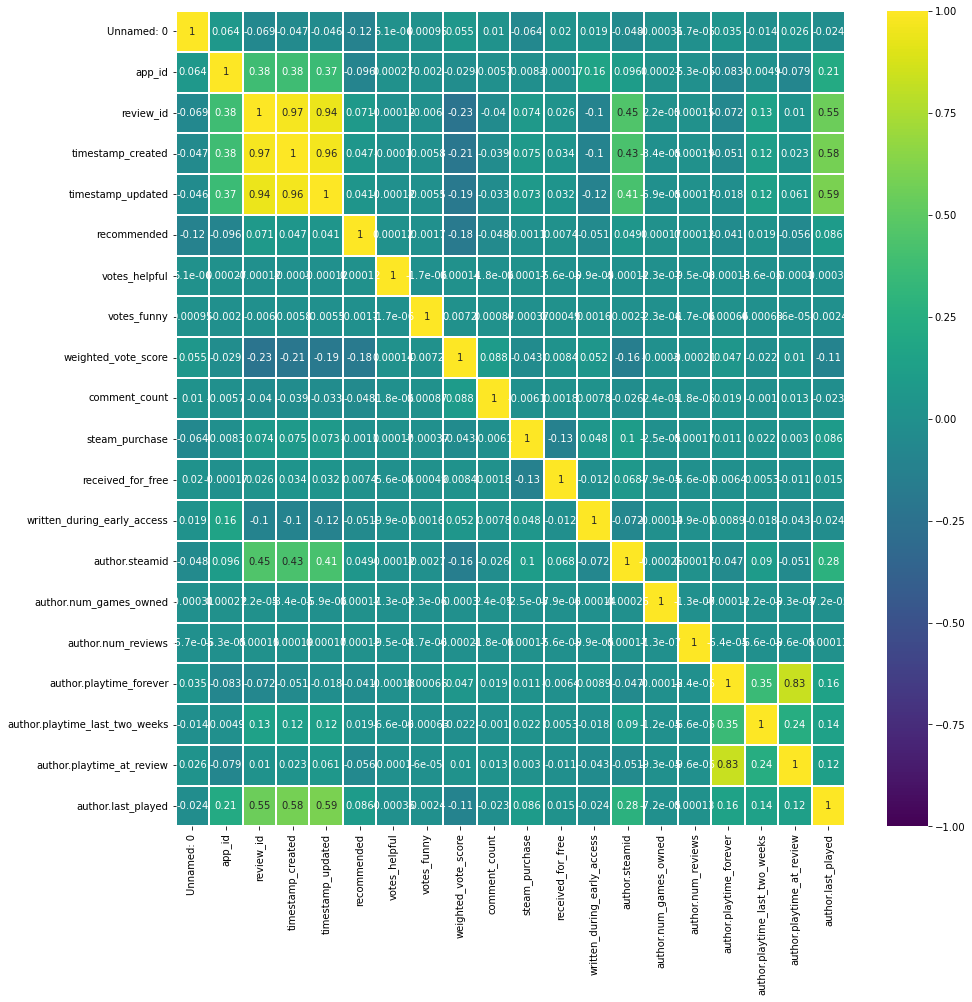

In [15]:
#seaborn.heatmap(df)
df_kor = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)



We see that there is a positive correlation (0.96) between the variables timestamp_created and timestamp_update and this is not 
surprising because most of the people never update their review ( most of the values stay the same).
It is also easy to understand the high correlation (0.83 ) between author.playtime_at_review and author.playtime_forever 
since the variable are the same untill the moment of the review.
For what concerns negative correlation, there is not any remarkable relationship.

Now let's focus on the variables that we consider more interesting. We start with app_name.

In [16]:
#App_name LEO


df_new=df[['app_name']]
grp = df_new.groupby('app_name').size()

app_names=grp.sort_values(ascending=False)
app_names=pd.DataFrame(app_names)
app_names.columns=['Occurences']
app_names[:10]




,Occurences
app_name,
PLAYERUNKNOWN'S BATTLEGROUNDS,1644255
Grand Theft Auto V,1019116
Tom Clancy's Rainbow Six Siege,841918
Terraria,672815
Garry's Mod,655524
Rust,549074
Rocket League,498565
PAYDAY 2,487747
Among Us,485293


<AxesSubplot:ylabel='Occurences'>

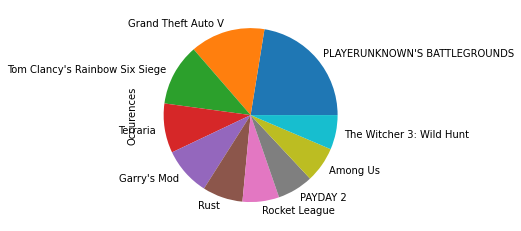

In [17]:
result=app_names['Occurences'][:10]
result.plot.pie()


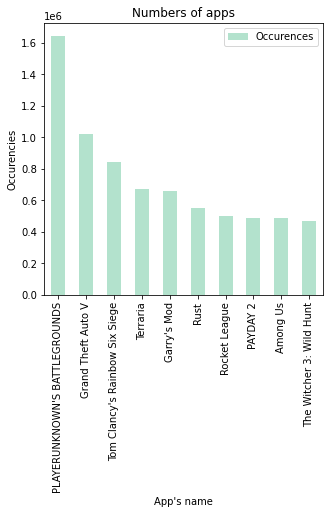

In [62]:
app_names.head(10).plot.bar( figsize=(5,5),
                            colormap = 'Pastel2', rot = 90, title = 'Numbers of apps',
                            xlabel = "App's name", ylabel = 'Occurencies')
plt.show()

In [19]:
#App_name
'''

#x=df["app_name"].value_counts(normalize=True) #in percentuale le diverse app recensite
#names=df["app_name"].unique() #nomi app
#print(names)

label=app_names['app_name'][:]

x_1=app_names['Occurences'][:]
x_1
#print(x_1)

#Grafico a torta

#x.plot.pie() #labels=label)
#plt.show()

''';

In total there are 315 different apps, the most common are: PLAYERUNKNOWN'S BATTLEGROUNDS (8%),Grand Theft Auto V (5%) and.. (bo va visto sui dati tot).


Now we consider the language. The most common are...

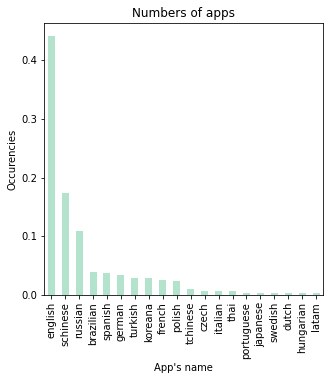

In [67]:
result=df["language"].value_counts(normalize=True)
result.head(20).plot.bar( figsize=(5,5),
                            colormap = 'Pastel2', rot = 90, title = 'Numbers of apps',
                            xlabel = "App's name", ylabel = 'Occurencies')
'''
data=[0.46,0.14,0.11]
labels = ['english', 'chinese', 'russian']
plt.xticks([1,2,3], labels)
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.title("Language's barplot")
plt.bar([1,2,3], data)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(0.0,1)
plt.show()
''';


Recommended and steam_purchase 
We observe that 92% of review authors recommend the app and 78% of them purchased the app on Steam. But only 72% of the authors give a positive opinion and then actually buy the app.

In [70]:
print(df["recommended"].value_counts(normalize=True))
print()

print(df["steam_purchase"].value_counts(normalize=True))

print(len(df[  (df.recommended == True) &(df.steam_purchase == True)  ])/ len(df['recommended']))

True     0.874312
False    0.125688
Name: recommended, dtype: float64

True     0.773506
False    0.226494
Name: steam_purchase, dtype: float64
0.6761325714285714



author.num_reviews :Number of lifetime app reviews by author
Con i dati veri si può fare un commento.


In [22]:
print(df["author.num_reviews"].describe())


count    2.100000e+07
mean     4.188720e+05
std      1.357267e+09
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.000000e+01
max      4.398047e+12
Name: author.num_reviews, dtype: float64


# RQ2: Let's explore the dataset by finding simple insights into the reviews.

### Plot the number of reviews for each application in descending order.
We simply count the number of reviews for each app (grouped by app_name) and order them


<AxesSubplot:>

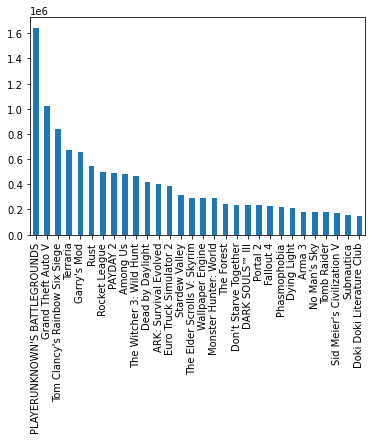

In [81]:
new = df[['app_name']]
a=new["app_name"].value_counts()
app_sort=a.sort_values(ascending=False) #lo salvo perchè serve dopo
app_sort.head(30).plot.bar()

### What applications have the best Weighted Vote Score?
We group by app_name, and see both which apps have the absolute highest score, and on average.


In [24]:
#In this way  the apps are sorted by  the score and then we can consider the top 5/10 (is up to us).
new_1 = df[['app_name','weighted_vote_score'  ]]
new_1.sort_values(by='weighted_vote_score',ascending=False)
#In this way I compute the average score for each app
new_1.groupby('app_name').agg({"weighted_vote_score":"mean"})
#LO lascerei svolto in entrambi i modi, come dicono su slack. Non gredo che agg (aggregate) sia necessario ma non sapevo  farlo senza. Non faccio i commenti perchè tanto i risultati finali saranno diversi.

,weighted_vote_score
app_name,
20XX,0.209921
A Hat in Time,0.167747
A Short Hike,0.138672
A Way Out,0.161331
ARK: Survival Evolved,0.193326
...,...
X-Blades,0.252000
XCOM 2,0.174441
Yakuza 0,0.197277


We group by app_name, and see both which apps have the absolute highest score, and on average.

### Which applications have the most and the least recommendations?

For each app, we count how many times it has been recommended.

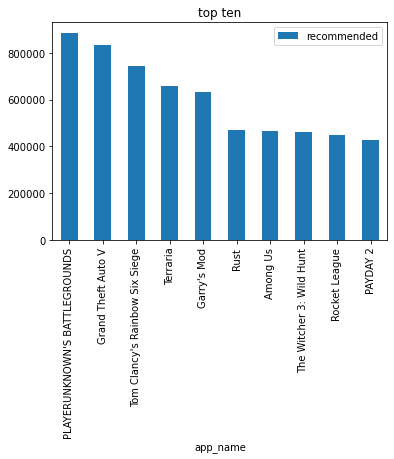

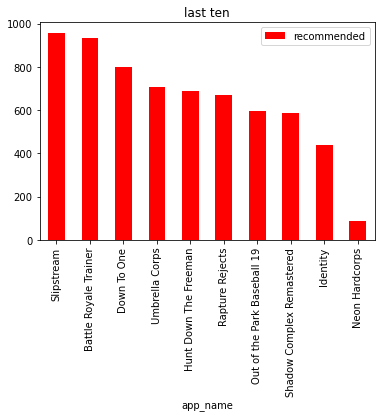

In [79]:

y=df.groupby('app_name').agg({"recommended":"sum"})
#print(y)

y=y.sort_values(by="recommended",ascending=False)
#print('the most recommended application is ...... with a total number of recommendations of .....', )
y.head(10).plot.bar(title='top ten')
#print('the worst recommended application is ..... with a total number of recommendations of ....', )
y.tail(10).plot.bar(title='last ten',color='red') #least
plt.show()

### How many of these applications were purchased, and how many were given for free?

In [26]:

print(df["steam_purchase"].value_counts(normalize=True))
print(df["received_for_free"].value_counts(normalize=True))
#Steam purchased: True se l'autore ha comprato l'app su Steam
#Received for free: True se ha ricevuto l'app gratis.
#non so bene quale vuole, per me il secondo ma boo

True     0.773506
False    0.226494
Name: steam_purchase, dtype: float64
False    0.968032
True     0.031968
Name: received_for_free, dtype: float64


# RQ3: Now it's important to understand the preferred time to do reviews.




### Request 1


I'll use the already loaded-in-memory dataset (in the variable df) in order to map every timestamp_created entry from the Datetime format, to a tuple made by the integer value of hour and minutes, once it's done i'll use the obtained column to group by the mapped rows counting the occourrence of every distinct row, i've subsequently used that pd.Series in order to extract the couple (hour, minutes) that maximizes the number of rows, so the number of reviews made in that hour range

The results are printed with a formatted string

In [27]:
from datetime import datetime
df = read_csv_with_time(fname, ['timestamp_created'], n_rows=10e6, usecols=['timestamp_created'])

# Converting the timestamps in tuples made by hours and minutes
timed = df.timestamp_created.apply(lambda x: (x.hour, x.minute))
# grouping by values (the tuples of above) and counting the occourrences
timed = timed.groupby(timed).count() 
amax = timed.argmax() # Getting the index of the maximum value

# Retrievieng the answers and formatting them...
hh, mm = timed.index[amax]
n_rev = timed.values[amax]
hh = "{:0>2d}".format(hh)
mm = "{:0>2d}".format(mm)

print(f"The most common hour in wich are published the greater part of the reviews is at {hh}:{mm} with {n_rev} reviews published")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/HW2-ADM/steam_reviews.csv'

### Request 2

The function required is the following and returns a pd.Series where the index are the index of the corresponding hour range and the values are the number of reviews made in that range

In [ ]:
def new_bis(ranges, ds=fname, n_rows=1e6):
    df = read_csv_with_time(ds, ['timestamp_created'], n_rows, usecols=['timestamp_created'])
    ranges_int = get_integer_ranges(ranges)
    ranged = df.timestamp_created.apply(lambda x: get_integer_range_index((x.hour, x.minute, x.second), ranges_int))
    ranged = ranged.groupby(ranged).count()
    return ranged

### Request 3

I've used the function above in order to plot by an horizontal bar chart, the number of reviews made for every hour range of the default ranges shown in the table above

In [ ]:
ret = new_bis(def_ranges, n_rows=30e6)
plt.figure(figsize=(20,10))
ax = ret.plot(kind="barh", color='green')
ax.set_title("Reviews per hour ranges")
ax.set_ylabel("hour ranges")
ax.set_xlabel("Num of reviews")
ax.set_yticklabels(def_ranges)
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# RQ4 As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

### What are the top 3 languages used to review applications?

Group values by language and account.


In [28]:
lingue=df["language"].value_counts(normalize=True)
top=lingue[:3]
top_list=list(top.index)
print(*(x for x in top_list), sep='\n')
#top five

english
schinese
russian


### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [29]:

def filter_language(dataset, languages,col_name):
  return dataset.loc[dataset[col_name].isin(languages)]


### Use the function created in the previous literal to find what percentage of these reviews (associated with the the top 3 languages) were voted as funny?

After creating the subset by filtering with the function, we look for the lines that correspond to each language and that have at least one "vote_funny". Same for "vote_helped".

In [30]:
for i in top_list:
     print(i+"   "+str(round(sum((df['votes_funny']==0) & (df['language']==i))/sum(df['language']==i),2))+"%")


english   0.89%
schinese   0.88%
russian   0.83%


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [31]:
df_1= filter_language(df,top_list,'language') #dati filtrati
for i in top_list:
  print(i+"   "+str(round(sum((df['votes_helpful']!=0) & (df['language']==i))/sum(df['language']==i),2))+"%")

english   0.29%
schinese   0.25%
russian   0.35%


# RQ5 The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

### Plot the top 10 most popular reviewers and the number of reviews.

<AxesSubplot:xlabel='author.steamid'>

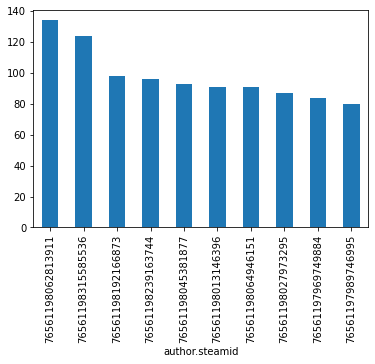

In [32]:
#df= pd.read_csv('/content/drive/MyDrive/HW2-ADM/steam_reviews.csv',nrows=10000000)
df_auth = df.groupby('author.steamid').review_id.count().sort_values(ascending=False)
df_auth[:10].plot.bar()

### What applications did the most popular author review? 

In [33]:
from_bigger_reviewer = df[df['author.steamid'] == df_auth[:1].index[0]]


In [34]:
from_bigger_reviewer['app_name']

512675                           Half-Life
539037              Counter-Strike: Source
658130            Half-Life 2: Episode Two
849477                            Portal 2
1549581                        Garry's Mod
                         ...              
20921224                          Yakuza 0
20948483                   Thief Simulator
20955607                    Darksiders III
20972603    Mutant Year Zero: Road to Eden
20986996                      Just Cause 4
Name: app_name, Length: 134, dtype: object

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [35]:
free = from_bigger_reviewer[from_bigger_reviewer.received_for_free]
n_free = len(free)
purchased = from_bigger_reviewer[from_bigger_reviewer.steam_purchase]
n_purch = len(purchased)
tot = len(from_bigger_reviewer)
print(f"He got for free {n_free} applications ({n_free/tot*100}%) and purchased {n_purch} ({n_purch/tot*100}%) on total of {tot}")
print('   ')
print(f"The author's recommended {len(free['recommended'])} and doesn't recommended {n_free-len(free['recommended'])} application from the ones received for free")


He got for free 4 applications (2.9850746268656714%) and purchased 99 (73.88059701492537%) on total of 134
   
The author's recommended 4 and doesn't recommended 0 application from the ones received for free


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [36]:
print('   ')
print(f" recommended {len(purchased['recommended'])} and doesn't recommended {n_purch-len(purchased['recommended'])} application from the ones purchased")

   
 recommended 99 and doesn't recommended 0 application from the ones purchased


# [RQ6] It's time to get information from the updates that a user does to his reviews.

### What is the average time (days and minutes) a user lets pass before he updates a review?

In [37]:
print(f"The average time that pass between the creation and the update of the reviews is: {(df.timestamp_updated - df.timestamp_created).mean(numeric_only=False)}")


The average time that pass between the creation and the update of the reviews is: 3147341.766038


### Plot the top 3 authors that usually update their reviews.

In [38]:
df['updated'] = df.timestamp_created == df.timestamp_updated
grouped = df.groupby(df['author.steamid']).updated.sum().sort_values(ascending=False)
auth = grouped[:3].index
print("The authors that has updated their reviews more often are, in order:")
for a in auth:
  print(f"\t*{a} with {grouped[a]} updated reviews")

The authors that has updated their reviews more often are, in order:
	*76561198315585536 with 121 updated reviews
	*76561198062813911 with 85 updated reviews
	*76561198083413093 with 74 updated reviews


# RQ7 Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

Simply whoever has a w. score greater than 0.5 on the total of the lines.


In [39]:
#Prob = fav. cases / possible cases
p1=sum(df['weighted_vote_score']> 0.5)/df.shape[0]


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

Conditional probability formula: Prob (A given B) = Prob (A intersection B) / Prob (B)


In [40]:
#prob condizionata

intersezione=sum((df['weighted_vote_score']> 0.5)& (df['votes_funny']!=0))/df.shape[0]
p2=intersezione/p1
p2

0.24797052510544726

### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

Statistical definition of independence: Joint probability is the product of the marginals.
It doesn't happen here.

In [41]:
pa= sum(df['votes_funny']!=0)/df.shape[0]
pa*p1==intersezione
#False, quindi Non sono indipendenti

False

# RQ8 Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choicv1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
!pip3 install  researchpy
import scipy.stats as stats
import matplotlib.pyplot as plt
import researchpy as rp

In [42]:
s1=df['weighted_vote_score'][df['language'] == 'russian']
s2=df['weighted_vote_score'][df['language'] == 'schinese']
print(s1.describe())
print(s2.describe())


This is just an overall view: the two means are quite different (0.257 as average score for russian and 0.145 for chinese). We note that in both cases the first and second quantiles are equal to zero, this means that this is the weighted average score of many reviews. Now we represent the two distributions,without considering the cases in which the score is zero.


In [43]:
z1= s1[s1!=0]
z2= s2[s2!=0]
z2
sns.displot(z1)
plt.ylim(0,80000)

sns.displot(z2)
plt.ylim(0,150000)

count    3.637372e+06
mean     1.440565e-01
std      2.385317e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.744526e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

Since N is very large, we assume to deal with normal distributions (even if in the second case the relative frequency of the average value is too high. Observe that without the zeros the two samples are much more similar.

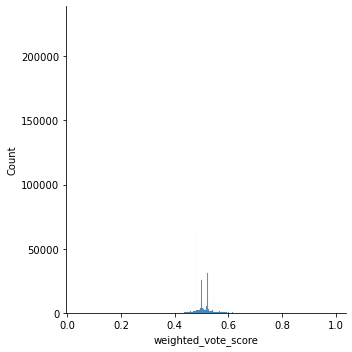

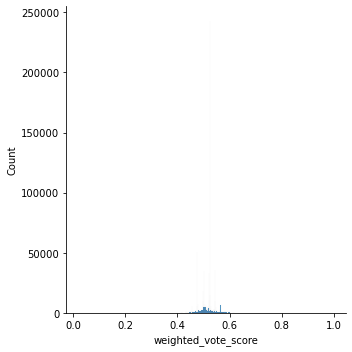

In [44]:
print(z1.describe())
print(z2.describe())

Under this assumption we apply a T-test that is a parametric test used to test for a statistically significant difference in the means between 2 groups. 

In [ ]:
summary, results = rp.ttest(group1= z1, group1_name= "Russian", group2= z2, group2_name= "Chinese",  equal_variances= False)
#print(summary)
print(results)

Based on the p-value in the third case, Difference > 0,that is equal to 1, we accept the null hypothesis, so we can say that there is a difference.

### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

An idea could be fitted a linear regression, where y=W vote score is the dependent variable and the time between creation and update is the predictor.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:
y=df[ 'weighted_vote_score'] #dependent var
y=np.array(y)
t2=(df.timestamp_updated - df.timestamp_created) #predictor
t2=np.array(t2)
t2=t2.reshape((-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t2, y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

In [ ]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

The square R shows the amount of variance explained by the model. It's something like your model's capabilities. The adjusted R squared is also similar to the R squared, but it only counts statistically significant variables. In our case, they are both very low. The coefficient of x is statistically significant (p<0.05), but it is so low as to be insignificant. Also graphically we see that the line does not fit well with the model, therefore we cannot say that there is a significant (linear) relationship-

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

We again fit a regression adding the variable "reccomended" as boolean (False=0,True=1).


In [ ]:
t3=df['recommended'].astype(int)
t4=t2=(df.timestamp_updated - df.timestamp_created)
t4=np.array(t4)
X_1=np.vstack([t4,t3])
X_1 = X_1.transpose()


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

In [ ]:
X1_train = sm.add_constant(X1_train)
results1 = sm.OLS(y1_train, X1_train).fit()
results1.summary()

Surely the R-square value is higher, we have a slightly better model. Both variables are stat. significant and looking at the coefficient of x2 (recmmended) equal to -0.13 we can say that we expect the score to be lower than 0.13 when recommended = 0, or False (compared to the expected average score). Again the time coefficient is very small, even if bigger then the previous case. To sum up, we can say that the "link" between the variables is slightly stronger in this case, but not worthy of note.

### What are histograms, bar plots, scatterplots and pie charts used for?

A histogram is visula representation of the distribution of numerical data usually grouped in bins which a non 
overlapped series of intervals.
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights 
or lengths proportional to the values that they represent.
A scatter plot uses dots to represent values for two different numeric variables expressing the relationship that 
occurs between the two variables.
A pie chart is a circular graphic method which is used to illustrate numerical proportion into a group of variables.


### What insights can you extract from a Box Plot?

The box-plot is a graphical representation that can be used to describe the distribution of data through 5 indices: the minimum, the maximum, the median (quantile lev=0.5) and the first and third quartiles.
The "box" is delimited by the first and third quartiles (so the height is the interquantile difference IQR = q3-q1)and divided inside by the median. The "whiskers" are delimited by the minimum and maximum of the values. In this way the data is divided into four intervals with the same number of elements and this shows, for example, if the distribution is symmetric or not. Data that does not fit into the "whiskers" are called outliers, they are defined as outside the interval [-IQR,+IQR].

# Bonus points

In [ ]:
'''
For this homework, you are required to work with all data in the steam_reviews.csv. An extension (two files) 
of the dataset is available in the next links:

a. File 1 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_1.zip.

b. File 2 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_2.zip.

It is not necessary to use the extension for this homework, however, if you decide to use it, we will take it into
account in the final evaluation. In summary, to get the bonus points you are required to work with
[steam_reviews.csv + two files of extension] all together.
''';


# Theoretical Questions

# TQ1

In [ ]:
'''
We are given the following algorithm.

Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
''';
import random
#IMPLEMENTATION
'''
def alg(A, k):
    #s= a random element of A
    s=random.choice(A)
    print(s)
    L = [x for x in A if x<=s]
    print('L=',L)
    R = [x for x in A if x>s]
    print('R=',R)
    lung = len(L)
    if k == lung:
        return s
    elif k < lung:  
        return alg(L, k)
    else:
        return alg(R, k - lung)
    
alg(A,k)
''';

### What does the algorithm compute?

The algorith find the k smallest element in the Array.

### What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

The worst case occurs when s=min(A)  and k=len(A).
In this situation: $$\begin{align}T(n) &= n + T(n-1)\\&= n + (n-1) + T(n-2)\\&= ...\\&=   \sum_{i=0}^{n}n-i\\&= (\sum_in + \sum_i i)\\&= ...\\&= n^2 - n\\&=O(n^2) \end{align}$$

There are degenerate cases where we can not guarantees the convergence of the algorithm:
$$ \begin{itemize}
    \ K=0
    \ s=max(A): the probability is almost 0, but we can not exclude this behaviour
    \ the element we are looking is repeated in the array
\end{itemize} $$

In [ ]:
### What is asymptotically the running time of the algorithm in the best case?

The best case occurs for k=len(L) and the running time is $$ T(n)=1+n+1+1= O(n) $$

The medium running time is $$ O(n) $$

# TQ2

In [ ]:
'''
You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
  
The subroutine swapList is described here:

function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
'''
#IMPLEMENTATION


def splitSwap(a, l, n, lvl=0):
    if n <= 1:
        return
    indent = '\t'*lvl
    print(f"{indent}entered at lvl {lvl} with a: {a}\n")
    splitSwap(a, l, n//2, lvl+1)
    splitSwap(a, l+ n//2, n//2, lvl+1)
    print(f"{indent}* a pre_swap: {a}")
    swapList(a, l, n)
    print(f"{indent}* a after_swap: {a}\n\n")

def swapList(a, l, n):
    for i in range(n//2):
        tmp = a[l + i]
        a[l + i] = a[l + n//2 + i]
        a[l + n//2 + i] = tmp
    
splitSwap([i for i in range(1,9)], 0, 8)




### How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

In [ ]:
# Alessandro ha il codice latex

### What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result. HINT: Consider the scenario where len(a) and n are numbers that are a power of 2.

In [ ]:
The algorith reverse the subarray starting from the index i untill i+n : as the implementation shows, in every
level we swap a subarray of dimension 2^(log2(n)-1-level).
The algorith is not optimal since we can solve the same problem with an algorith with O(n)=n.
For example we can consider another array B in which we store the elements of the Array A from the index l+n untill l 
( step=-1) and then we could copy the elements of B in the positions l untill l+n of A


In [ ]:
def another_algorith(A,l,n):
    B=[]
    for i in range(l+n,l,-1):
        B.append(A[i])
    for i in range(l,l+n):
        A[i]=B[i-l]
        

# TQ3

In [ ]:
'''
In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i.
We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W 
that maximized the sum of their values. The following are three natural heuristics:

*Order them in increasing order of weight and then visit them sequentially, adding them to the solution 
as long as the budget is not exceeded

*Order them in decreasing order of values, and then visit them sequentially, adding them to the solution 
if the budget is not exceeded

*Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the 
solution if the budget is not exceeded
''';

### For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

### First 

Suppose the existence of two elements A={p=2,v=2}, B={p=1,v=0} and set the weight budget=W=2.
If we order the objects in increasing order of weight and then visit them sequentially, adding them to the solution
as long as the budget is not exceeded , we will find {B} with a total value of 0.
This is not an optimal solution since the solution given by {A} respects the weight costraint 
and has a total value of 2.

### Second

Suppose the existence of three elements A={v=3,p=3},B={v=2,p=1},C={p=1,v=2} and set the weight budget=3.
If we order them in decreasing order of values, and then visit them sequentially, adding them to the 
solution if the budget is not exceeded, we will find {A} with a total value of 3.
This is not an optimal solution since the solution given by {B,C} has a total weight of 2 and a total value of 4.


### Third

Suppose the existence of two elements A={v=2,p=1,v/p=2}, B={v=3,p=3,v/p=1} and set the weight budget=3.
If we order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them
to the solution if the budget is not exceeded, we will find {A} with a total value of 2.
This is not an optimal solution since the solution given by {B} respects the weight costraint 
and has a total value of 3.